# Bài 1: Xác định các yêu tố của bài toán tìm kiếm


Xác định các yêu tố của bài toán tìm kiếm cho các bài toán sau:
- Đỉnh có 5 đỉnh A, B, C, D với liên kết: A → {B,C,F}, B → {A, C, E, F}, C → {A,B,D, F}, D → {C, F}, E → {B,D,F}, F → {A,C,E}
- Tìm đường đi từ A đến D



In [18]:
# Import thư viện cần thiết
from collections import deque, defaultdict
import networkx as nx
import matplotlib.pyplot as plt

# ===== ĐỊNH NGHĨA BÀI TOÁN =====
class SearchProblem:
    def __init__(self):
        # Đồ thị được biểu diễn bằng danh sách cạnh 
        self.graph = {
            'A': ['B', 'C', 'F'],
            'B': ['A', 'C', 'E', 'F'],
            'C': ['A', 'B', 'D', 'F'],
            'D': ['C', 'F'],
            'E': ['B', 'D', 'F'],
            'F': ['A', 'C', 'E']
        }
        
        # ===== CÁC YÊU TỐ CỦA BÀI TOÁN TÌM KIẾM =====
        self.initial_state = 'A'      # 1.  ban đầu
        self.goal_state = 'D'         # 2.  đích
        self.search_space = set(self.graph.keys())  # 3. Không gian tìm kiếm
        
    def get_operators(self, state):
        """4. Các hành động/toán tử: Trả về danh sách đỉnh kề từ state"""
        return self.graph.get(state, [])
    
    def is_goal(self, state):
        """Kiểm tra đó có phải trạng thái đích không"""
        return state == self.goal_state
    
    def print_problem_elements(self):
        """In ra các yêu tố của bài toán tìm kiếm"""
        print("=" * 60)
        print("CÁC YÊU TỐ CỦA BÀI TOÁN TÌM KIẾM")
        print("=" * 60)
        print(f"1. Trạng thái ban đầu: {self.initial_state}")
        print(f"2. Trạng thái đích: {self.goal_state}")
        print(f"3. Không gian tìm kiếm: {sorted(self.search_space)}")
        print(f"4. Các hành động/Toán tử:")
        for state in sorted(self.search_space):
            neighbors = self.get_operators(state)
            print(f"   {state} → {neighbors}")
        print("5. Chi phí: Mỗi cạnh có chi phí = 1")
        print("=" * 60)

# Tạo bài toán
problem = SearchProblem()

# In các yêu tố của bài toán
problem.print_problem_elements()

CÁC YÊU TỐ CỦA BÀI TOÁN TÌM KIẾM
1. Trạng thái ban đầu: A
2. Trạng thái đích: D
3. Không gian tìm kiếm: ['A', 'B', 'C', 'D', 'E', 'F']
4. Các hành động/Toán tử:
   A → ['B', 'C', 'F']
   B → ['A', 'C', 'E', 'F']
   C → ['A', 'B', 'D', 'F']
   D → ['C', 'F']
   E → ['B', 'D', 'F']
   F → ['A', 'C', 'E']
5. Chi phí: Mỗi cạnh có chi phí = 1


##  BFS 

In [19]:
# ===== THUẬT TOÁN TÌM KIẾM BFS =====
def bfs_search(problem):
    
    queue = deque([(problem.initial_state, [problem.initial_state])])
    visited = {problem.initial_state}
    
    while queue:
        current_state, path = queue.popleft()
        
        if problem.is_goal(current_state):
            return path
        
        for next_state in problem.get_operators(current_state):
            if next_state not in visited:
                visited.add(next_state)
                queue.append((next_state, path + [next_state]))
    
    return None  # Không tìm thấy đường đi

# Tìm kiếm BFS
bfs_path = bfs_search(problem)
if bfs_path:
    print(f"\n✓ BFS: Đường đi từ {problem.initial_state} → {problem.goal_state}")
    print(f"  Đường đi: {' → '.join(bfs_path)}")
    print(f"  Chiều dài: {len(bfs_path) - 1} bước")
else:
    print(f"\n✗ BFS: Không tìm thấy đường đi")


✓ BFS: Đường đi từ A → D
  Đường đi: A → C → D
  Chiều dài: 2 bước


##  DFS

In [20]:
# ===== THUẬT TOÁN TÌM KIẾM DFS =====
def dfs_search(problem):
    """Tìm kiếm theo chiều sâu (Depth-First Search)"""
    stack = [(problem.initial_state, [problem.initial_state])]
    visited = {problem.initial_state}
    
    while stack:
        current_state, path = stack.pop()
        
        if problem.is_goal(current_state):
            return path
        
        for next_state in problem.get_operators(current_state):
            if next_state not in visited:
                visited.add(next_state)
                stack.append((next_state, path + [next_state]))
    
    return None  # Không tìm thấy đường đi

# Tìm kiếm DFS
dfs_path = dfs_search(problem)
if dfs_path:
    print(f"\n✓ DFS: Đường đi từ {problem.initial_state} → {problem.goal_state}")
    print(f"  Đường đi: {' → '.join(dfs_path)}")
    print(f"  Chiều dài: {len(dfs_path) - 1} bước")
else:
    print(f"\n✗ DFS: Không tìm thấy đường đi")


✓ DFS: Đường đi từ A → D
  Đường đi: A → F → E → D
  Chiều dài: 3 bước


##  Đồ thị

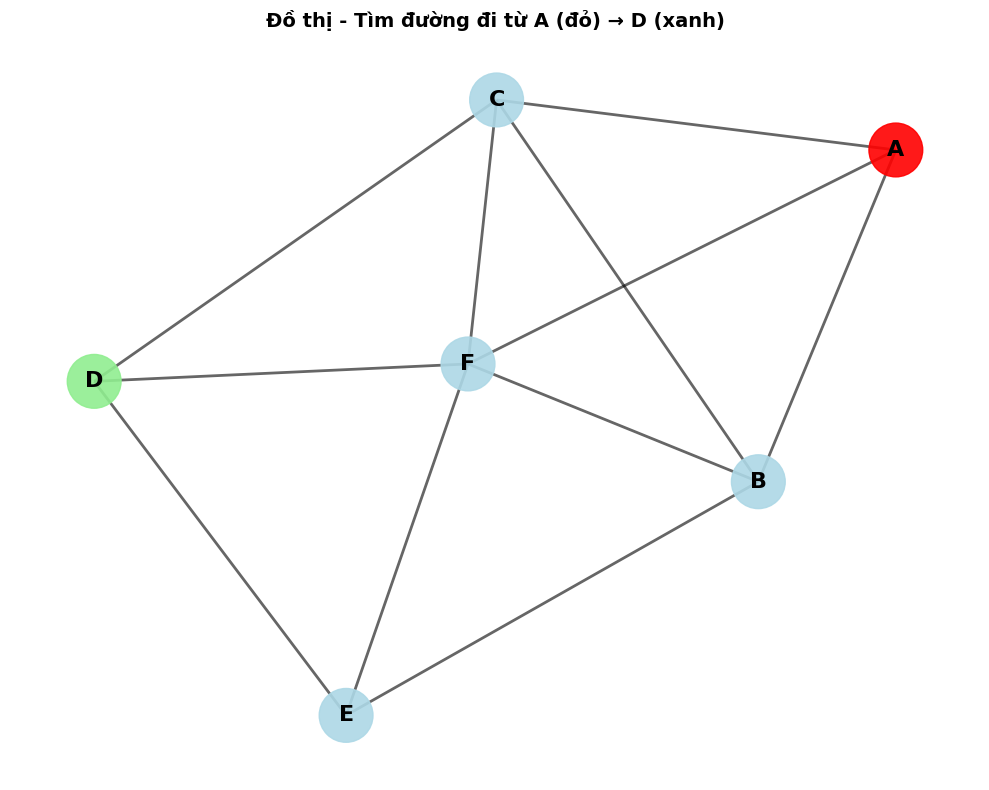


 Nút đỏ: Điểm bắt đầu (A)
Nút xanh: Điểm đích (D)
Nút xanh nhạt: Các nút khác


In [21]:
# Vẽ đồ thị sử dụng NetworkX
G = nx.Graph()

# Thêm các đỉnh
for node in problem.search_space:
    G.add_node(node)

# Thêm các cạnh
for node, neighbors in problem.graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Vẽ đồ thị
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42, k=2, iterations=50)

# Vẽ các node
node_colors = ['red' if node == problem.initial_state else 'lightgreen' if node == problem.goal_state else 'lightblue' 
               for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1500, alpha=0.9)

# Vẽ các cạnh
nx.draw_networkx_edges(G, pos, width=2, alpha=0.6)

# Vẽ labels
nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold')

plt.title(f"Đồ thị - Tìm đường đi từ {problem.initial_state} (đỏ) → {problem.goal_state} (xanh)", fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

# In thông tin
print(f"\n Nút đỏ: Điểm bắt đầu ({problem.initial_state})")
print(f"Nút xanh: Điểm đích ({problem.goal_state})")
print(f"Nút xanh nhạt: Các nút khác")

##  Kết quả 

In [22]:
import pandas as pd

# Tạo bảng so sánh kết quả
results = pd.DataFrame({
    'Thuật toán': ['BFS', 'DFS'],
    'Đường đi': [' → '.join(bfs_path) if bfs_path else 'Không tìm thấy', 
                 ' → '.join(dfs_path) if dfs_path else 'Không tìm thấy'],
    'Chiều dài': [len(bfs_path) - 1 if bfs_path else None, 
                  len(dfs_path) - 1 if dfs_path else None],
    'Tính chất': ['Tìm đường đi ngắn nhất', 'Không đảm bảo ngắn nhất']
})

print("\n" + "=" * 80)
print("KẾT QUẢ SO SÁNH CÁC THUẬT TOÁN TÌM KIẾM")
print("=" * 80)
print(results.to_string(index=False))
print("=" * 80)

print(f"\nĐÁNH GIÁ:")
if bfs_path and dfs_path:
    if len(bfs_path) <= len(dfs_path):
        print(f"→ BFS tìm được đường đi ngắn hơn: {len(bfs_path)-1} bước vs {len(dfs_path)-1} bước")
    else:
        print(f"→ DFS tìm được đường đi ngắn hơn: {len(dfs_path)-1} bước vs {len(bfs_path)-1} bước")
    print(f"→ Đáp án tối ưu: {' → '.join(bfs_path)} ({len(bfs_path)-1} bước)")


KẾT QUẢ SO SÁNH CÁC THUẬT TOÁN TÌM KIẾM
Thuật toán      Đường đi  Chiều dài               Tính chất
       BFS     A → C → D          2  Tìm đường đi ngắn nhất
       DFS A → F → E → D          3 Không đảm bảo ngắn nhất

ĐÁNH GIÁ:
→ BFS tìm được đường đi ngắn hơn: 2 bước vs 3 bước
→ Đáp án tối ưu: A → C → D (2 bước)
